___
# Decision Trees and Random Forests Lending Club Analysis

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

____
## Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [4]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

____
## Get the Data

#### Collecting Raw Data:

Below we have downloaded the CSV files to our given file. The CSV files include the publicly available dataq of lendingclub.com.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

We use pd.read to use the data for analysis and set each bank to be a separate dataframe, with the variable being the specifics companies acroynm. 

In [5]:
# creating loans variables from loan_data.csv
loans = pd.read_csv('loan_data.csv')

In [6]:
# information about the loans variable
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
# preview of loans data
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
# data metrics of loans data
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### Data check

- Looking for missing data to see if processing is needed.
- Checking if any of the numeric data is a string.

In [10]:
# calculates the sum of all the null values in all the fields(columns)
loans.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [12]:
# further check if any of the numeric data is not string
loans.dtypes.value_counts()

int64      7
float64    6
object     1
dtype: int64

#### Pre-Processing Completed

- We can see that there is no Null value in the data.

- This means there are no values in the dataset such as "Not Available" or "NA", etc.

- Both of these are highly indicative that all values are present.

# Exploratory Data Analysis

### Relationship between FICO and Credit underwriting

The below graph represents the relationships between the FICO score of the borrower and the customers ability to meet the credit underwriting criteria of LendingClub.com, or otherwise.

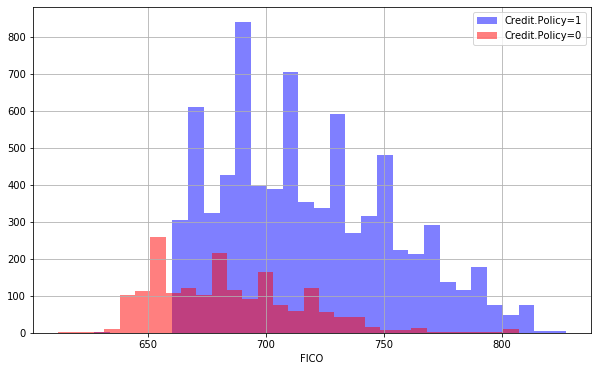

In [23]:
plt.figure(figsize=(10,6)) # increases the size of the graph to give parameters
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue', # graph if the customer meets the credit policy
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red', # graph if the customer does notmeets the credit policy
                                              bins=30,label='Credit.Policy=0')
plt.legend() # creates legends box
plt.xlabel('FICO');

#### Interpretation

The data indicates that: 

  - There are more people in the dataset that meet the credit underwriting criteria than do not.
  
  
  - People who have a lower FICO score, tend to not meet the credit underwriting criteria.


  - People who have a FICO score below 660, will not meet the lending criteria.

### Relationship between FICO and the ability to fully repay the amount borrowed

The below graph represents the relationships between the FICO score of the borrower and the customers ability to pay the full amount of their loans from LendingClub.com, or otherwise.

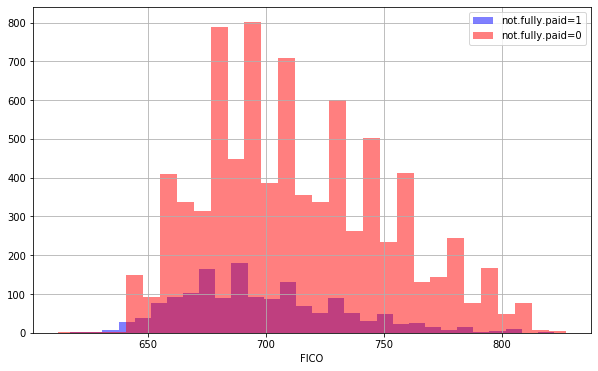

In [24]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO');

#### Interpretation

The data indicates that:

   - not fully paid and fully paid have a similar distribution. 
   
   - *FICO score outliers are normal tendency for FICO scores

### Amount of loans created seggregated by Purpose

The below graph represents the amount of loans created seggreagted by their purposes. Further the graph shows out of the loans, which have been repaid and not have been repaid.

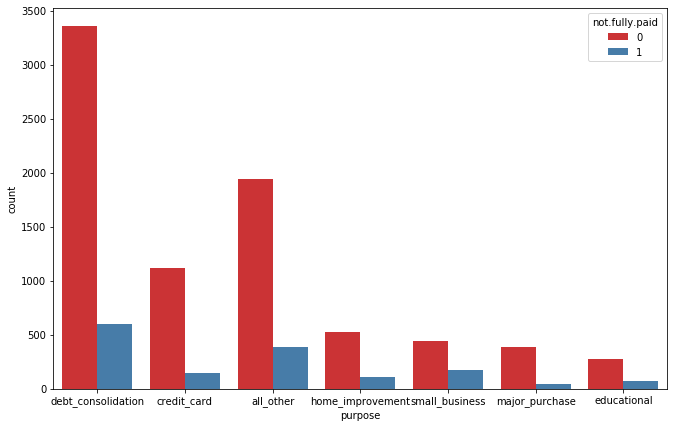

In [25]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1');

#### Interpretation

Most people who borrow from lendingclub.com are to consolidate their debts, which also has the most amount yet to be paid in full by customers.

This can indicate a large risk exposure, which needs to be considered as a point to explore by the risk team.

### Relationships between FICO score and interest rates

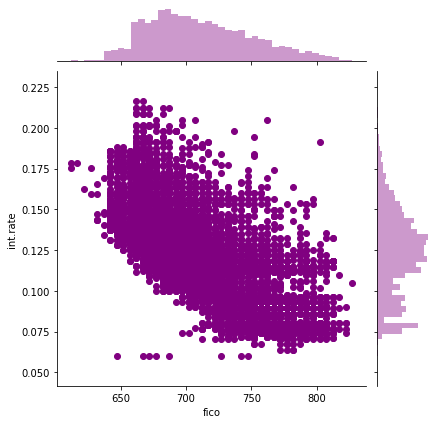

In [26]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple');

#### Interpretation

The data indicates that with a larger FICO score, comes lower interest rates.

Meanining that a larger FICO score indicates a safer customer to lend to, giving them a decreased interest rate as they are more likely to repay their loans.

### Trend between the credit policy and if the loans gets fully repaid

<Figure size 792x504 with 0 Axes>

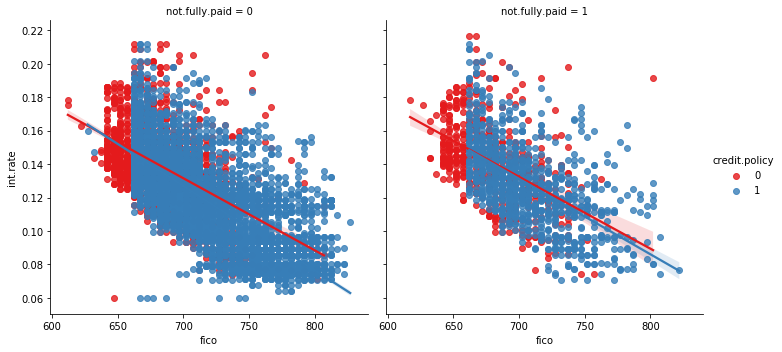

In [27]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1');

#### Interpretation

The data indicates that the graph is quite similar in if the borrower meets the credit policy or not, or if the borrower fully pays or does not fully repay their loan.

# Setting up the Data

Setting up our data for our Random Forest Classification Model.

In [18]:
# information about the data set
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

**purpose** column is categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. 

In [28]:
cat_feats = ['purpose']

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [34]:
final_data = pd.get_dummies(loans, columns = cat_feats, drop_first = True)

In [35]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [38]:
# preview of the data set
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [42]:
# impot train_test_split module
from sklearn.model_selection import train_test_split

In [43]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

In [40]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [44]:
dtree = DecisionTreeClassifier()

In [45]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree

In [46]:
predictions = dtree.predict(X_test)

In [13]:
# importing classification report and confusion matrix modules
from sklearn.metrics import classification_report,confusion_matrix

##### Classification Matrix

In [48]:
# print the classification report for the test results relationship with predictions
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.21       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



##### Confusion Matrix

In [49]:
print(confusion_matrix(y_test,predictions))

[[1999  432]
 [ 338  105]]


## Training the Random Forest model

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc = RandomForestClassifier(n_estimators=100)

In [54]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions and Evaluation

Prediction off the y_test values and evaluate our model.

In [55]:
rfc_pred = rfc.predict(X_test)

##### Confusion Matrix

In [57]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.55      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.70      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



##### Confusion Matrix

In [56]:
print(confusion_matrix(y_test,rfc_pred))

[[2421   10]
 [ 431   12]]


#### Clasification report reference

Precision - What percent of your predictions were correct?

    Precision = (TP / (TP + FP))
    
    
Recall - What percent of the positive cases did you catch?

    Recall = TP/(FP+FN)
    
    
F1 score - What perecent of positive predictions were correct?

    F1 Score = 2 * (Recall * Precision) / (Recall + Precisiion)
    

Support - The number of actual occuraences of the class in the specified dataset. Imbalance support in the training daya may indicate structureal weaknesses in the reported scores of the classfier and could indicate the need for stratified smapling or rebalancing.

#### Tentative Conclusion

What performed better the random forest or the decision tree?

- The Random Forest Classifier provided us with an accuracy of 80% while the Decision Tree method provided us with an accuracy of 73%. Hence, the Random Forest model appears to be a better option for such kind of data if we were optimising for accuracy.

- However, for both models the recall values for cases that were not fully paid ranged from 0.24 from the Decision trees and 0.03 from the Random Forrest Classifier, which indicate a rather small percentage of positive cases for borrowers that have not fully paid were caught.

- Additionally, f1 scores for predicitions of values that were not full paid were ranging from 0.21 for the Decision tree methods and 0.05 for for the Random Forest model, indicating a rather small percentage of correct positive predicitions.

- Therefore, given the recall values and other metrics, neither model did very well and will need more feature engineering.